# Jessica Williams Capstone 3 Exploratory Data Analysis(EDA)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
from yellowbrick.text import FreqDistVisualizer
from pathlib import Path
nlp=spacy.load('en_core_web_sm')
from textblob import TextBlob, Word, Blobber

from sb_utils import save_file

In [2]:
wine_list = pd.read_csv('C:/Users/jwatki8/Documents/Data Science Program information/Capstone project 3/data/wine_list.csv')

In [3]:
wine_ratings = pd.read_csv('C:/Users/jwatki8/Documents/Data Science Program information/Capstone project 3/data/wine_ratings.csv')

C:\Users\jwatki8\AppData\Local\Temp\ipykernel_5864\794216573.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  wine_ratings = pd.read_csv('C:/Users/jwatki8/Documents/Data Science Program information/Capstone project 3/data/wine_ratings.csv')


We are now looking at a dataset containing a dataframe of wines and there attributes as well as a dataframe of user ratings of wines. Let's explore.

In [4]:
wine_list.head()

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Vintages
0,100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
1,100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 200..."
2,100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
3,100004,Virtus Moscato,White,Varietal/100%,['Muscat/Moscato'],['Sweet Dessert'],12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10003,Monte Paschoal,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
4,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."


In [5]:
wine_ratings.head()

,RatingID,UserID,WineID,Vintage,Rating,Date,rating_mean
0,1,1604441,136103,1950,4.0,2019-10-14 11:20:52,3.611725
1,2,1291483,136103,1950,5.0,2019-11-28 03:36:33,3.611725
2,3,1070605,104036,1950,5.0,2017-12-28 10:15:55,4.551546
3,4,1080181,144864,1950,5.0,2016-06-23 02:16:22,3.746667
4,5,1834379,111430,1950,5.0,2021-05-16 17:58:14,4.773632


Let’s take a look at how many times our raters rated different wines.

In [6]:
wine_ratings['UserID'].nunique()

1056079

In [7]:
print(wine_ratings['UserID'].value_counts().max())

2986


In [8]:
wine_ratings['UserID'].value_counts().head(20)

1084433    2986
1034989    2979
1070878    2613
1048267    2597
1160536    2392
1000272    2309
1006657    2307
1019610    2291
1107271    2225
1035125    2101
1163129    2059
1165081    2004
1169598    1995
1165941    1923
1008661    1909
1028358    1859
1089420    1804
1878271    1800
1217756    1787
1151866    1721
Name: UserID, dtype: int64

In [9]:
wine_ratings['UserID'].value_counts().tail(20)

2007445    5
1376871    5
1831028    5
1161762    5
1524599    5
1331122    5
2028527    5
1921392    5
1347527    5
1415002    5
1912519    5
1721488    5
1495745    5
2008918    5
1010653    5
1808349    5
1301644    5
1344498    5
1407463    5
1064572    5
Name: UserID, dtype: int64

Since we already know that the minimum amount of times any unique rater rated a wine is 5, let’s see how many people this stands true for by creating a ‘rater_count’ column.

In [10]:
wine_ratings['rater_count'] = wine_ratings['UserID'].groupby(wine_ratings['UserID']).transform('count')

In [11]:
wine_ratings.head()

,RatingID,UserID,WineID,Vintage,Rating,Date,rating_mean,rater_count
0,1,1604441,136103,1950,4.0,2019-10-14 11:20:52,3.611725,25
1,2,1291483,136103,1950,5.0,2019-11-28 03:36:33,3.611725,7
2,3,1070605,104036,1950,5.0,2017-12-28 10:15:55,4.551546,655
3,4,1080181,144864,1950,5.0,2016-06-23 02:16:22,3.746667,30
4,5,1834379,111430,1950,5.0,2021-05-16 17:58:14,4.773632,9


In [12]:
wine_ratings['rater_count'].value_counts()[5]

477530

After creating a column that list the number of times a rater rated wine (rater_count), we can see that the number of raters that rated the lowest amount of times is 477530. This means that each rater in our system would have multiple wines and ratings for us to use as a base for recommendations.

I would also like to add a column for the mean rating of each rater.

In [13]:
wine_ratings['rater_mean'] = wine_ratings['Rating'].groupby(wine_ratings['UserID']).transform('mean')

In [14]:
wine_ratings.head()

,RatingID,UserID,WineID,Vintage,Rating,Date,rating_mean,rater_count,rater_mean
0,1,1604441,136103,1950,4.0,2019-10-14 11:20:52,3.611725,25,3.620000
1,2,1291483,136103,1950,5.0,2019-11-28 03:36:33,3.611725,7,3.857143
2,3,1070605,104036,1950,5.0,2017-12-28 10:15:55,4.551546,655,4.037405
3,4,1080181,144864,1950,5.0,2016-06-23 02:16:22,3.746667,30,4.100000
4,5,1834379,111430,1950,5.0,2021-05-16 17:58:14,4.773632,9,4.444444


In [15]:
wine_ratings.sort_values('rater_mean', ascending=False).head()

,RatingID,UserID,WineID,Vintage,Rating,Date,rating_mean,rater_count,rater_mean
18339045,18339046,1031969,162520,2019,5.0,2020-12-06 17:50:27,3.397447,6,5.0
564532,564533,1106775,111417,2003,5.0,2018-09-11 16:30:19,4.522930,51,5.0
564529,564530,1106775,111570,2003,5.0,2018-09-11 16:29:06,4.596956,51,5.0
10790132,10790133,1929812,138572,2015,5.0,2017-08-09 19:47:07,3.509749,18,5.0
17956446,17956447,1088643,155881,2018,5.0,2021-01-01 17:47:49,3.494246,7,5.0


In [16]:
wine_ratings.sort_values('rater_count', ascending=False).head()

,RatingID,UserID,WineID,Vintage,Rating,Date,rating_mean,rater_count,rater_mean
14231237,14231238,1084433,102359,2017,3.5,2021-09-13 21:55:51,3.684143,2986,3.60499
7729940,7729941,1084433,123083,2014,3.0,2017-02-21 22:30:41,3.637931,2986,3.60499
10580878,10580879,1084433,102469,2015,3.0,2017-11-20 18:17:19,3.331871,2986,3.60499
11423717,11423718,1084433,113800,2015,5.0,2020-11-30 18:40:21,4.487395,2986,3.60499
15616640,15616641,1084433,167937,2017,3.0,2018-05-26 21:39:12,2.726221,2986,3.60499


After creating this column and examining values it looks like the higher frequency raters have lower rating means as would be expected with having more data to summarize over.

Now I want to examine the distribution of the ratings.

In [17]:
wine_ratings['Rating'].value_counts()

4.0    8301655
3.5    3389567
5.0    2950264
3.0    2755661
4.5    2505818
2.5     468045
2.0     425593
1.0     152452
1.5      64481
Name: Rating, dtype: int64

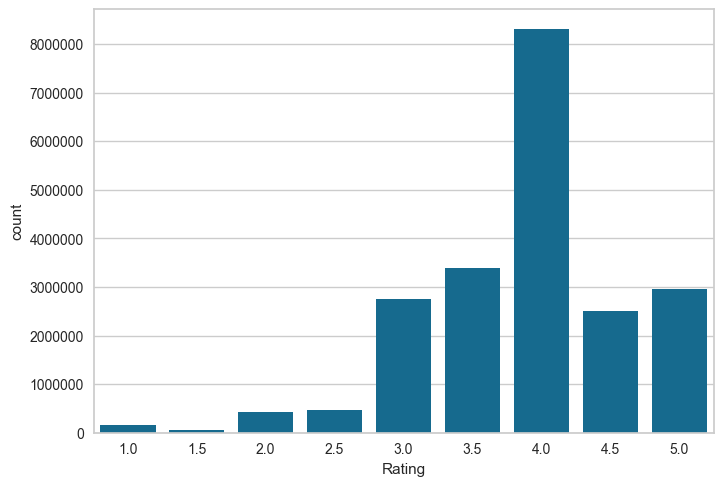

In [18]:
sns.countplot(data=wine_ratings, x='Rating')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


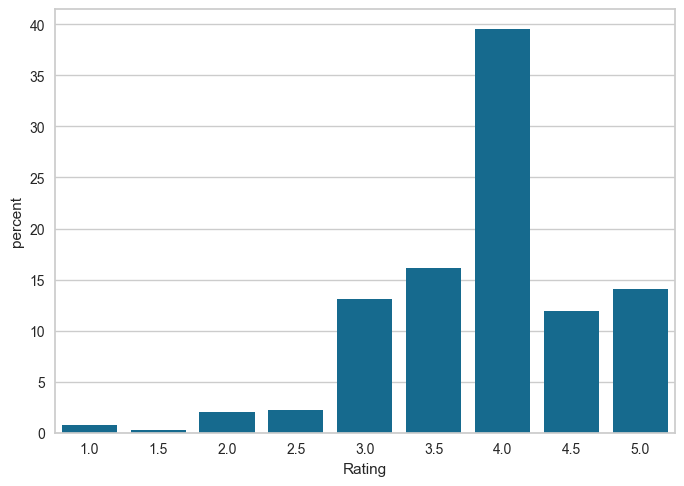

In [19]:
sns.countplot(data=wine_ratings, x='Rating', stat='percent')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

We can note a few things from these plots:

1. 4.0 is the most frequent rating.

2. Most of the ratings for the wines are above 3.0.

3. We have a significant count for all of the possible ratings.


Let’s take a look at the range for the amount of times a distinct wine in the list was rated.

In [20]:

print(wine_ratings['WineID'].value_counts().min())
print(wine_ratings['WineID'].value_counts().max())

5
27415


From this we can see that we have multiple ratings for all wines even though some have a lot more ratings than others.

Now that we have created a few more summary columns let’s merge the wine ratings and wine list dataframes.

In [21]:
wine_df = pd.merge(wine_ratings, wine_list[['WineID','WineName','Type','Elaborate','Grapes','Harmonize','ABV','Body','Acidity','Country','RegionID','RegionName','WineryID','WineryName','Vintages']], on=['WineID'])


In [22]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21013536 entries, 0 to 21013535
Data columns (total 23 columns):
 #   Column       Dtype  
---  ------       -----  
 0   RatingID     int64  
 1   UserID       int64  
 2   WineID       int64  
 3   Vintage      object 
 4   Rating       float64
 5   Date         object 
 6   rating_mean  float64
 7   rater_count  int64  
 8   rater_mean   float64
 9   WineName     object 
 10  Type         object 
 11  Elaborate    object 
 12  Grapes       object 
 13  Harmonize    object 
 14  ABV          float64
 15  Body         object 
 16  Acidity      object 
 17  Country      object 
 18  RegionID     int64  
 19  RegionName   object 
 20  WineryID     int64  
 21  WineryName   object 
 22  Vintages     object 
dtypes: float64(4), int64(6), object(13)
memory usage: 3.8+ GB


Next I would like to create dummy variables for some of the wine attributes to help us build recommendations later.

In [23]:
dummies1=pd.get_dummies(wine_df.Type)
dummies1=dummies1.add_prefix('type_')

In [24]:
print(dummies1.head(5))

   type_Dessert  type_Dessert/Port  type_Red  type_Rosé  type_Sparkling  \
0             0                  0         1          0               0   
1             0                  0         1          0               0   
2             0                  0         1          0               0   
3             0                  0         1          0               0   
4             0                  0         1          0               0   

   type_White  
0           0  
1           0  
2           0  
3           0  
4           0  


In [25]:
wine_df=pd.concat([wine_df,dummies1],axis=1)

In [26]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21013536 entries, 0 to 21013535
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   RatingID           int64  
 1   UserID             int64  
 2   WineID             int64  
 3   Vintage            object 
 4   Rating             float64
 5   Date               object 
 6   rating_mean        float64
 7   rater_count        int64  
 8   rater_mean         float64
 9   WineName           object 
 10  Type               object 
 11  Elaborate          object 
 12  Grapes             object 
 13  Harmonize          object 
 14  ABV                float64
 15  Body               object 
 16  Acidity            object 
 17  Country            object 
 18  RegionID           int64  
 19  RegionName         object 
 20  WineryID           int64  
 21  WineryName         object 
 22  Vintages           object 
 23  type_Dessert       uint8  
 24  type_Dessert/Port  uint8  
 25  type_Red        

In [27]:
dummies2=pd.get_dummies(wine_df.Elaborate)
dummies2=dummies2.add_prefix('elab_')

In [28]:
wine_df=pd.concat([wine_df,dummies2],axis=1)

In [29]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21013536 entries, 0 to 21013535
Data columns (total 51 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   RatingID                                int64  
 1   UserID                                  int64  
 2   WineID                                  int64  
 3   Vintage                                 object 
 4   Rating                                  float64
 5   Date                                    object 
 6   rating_mean                             float64
 7   rater_count                             int64  
 8   rater_mean                              float64
 9   WineName                                object 
 10  Type                                    object 
 11  Elaborate                               object 
 12  Grapes                                  object 
 13  Harmonize                               object 
 14  ABV                             

In [30]:
dummies3=pd.get_dummies(wine_df.Body)
dummies3=dummies3.add_prefix('body_')

In [31]:
wine_df=pd.concat([wine_df,dummies3],axis=1)

In [32]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21013536 entries, 0 to 21013535
Data columns (total 56 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   RatingID                                int64  
 1   UserID                                  int64  
 2   WineID                                  int64  
 3   Vintage                                 object 
 4   Rating                                  float64
 5   Date                                    object 
 6   rating_mean                             float64
 7   rater_count                             int64  
 8   rater_mean                              float64
 9   WineName                                object 
 10  Type                                    object 
 11  Elaborate                               object 
 12  Grapes                                  object 
 13  Harmonize                               object 
 14  ABV                             

In [33]:
dummies4=pd.get_dummies(wine_df.Acidity)
dummies4=dummies4.add_prefix('acid_')

In [34]:
wine_df=pd.concat([wine_df,dummies4],axis=1)

In [35]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21013536 entries, 0 to 21013535
Data columns (total 59 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   RatingID                                int64  
 1   UserID                                  int64  
 2   WineID                                  int64  
 3   Vintage                                 object 
 4   Rating                                  float64
 5   Date                                    object 
 6   rating_mean                             float64
 7   rater_count                             int64  
 8   rater_mean                              float64
 9   WineName                                object 
 10  Type                                    object 
 11  Elaborate                               object 
 12  Grapes                                  object 
 13  Harmonize                               object 
 14  ABV                             

I would also like to examine some of the correlations in our data. First let’s take a look at correlations between the wine attributes.

In [36]:
wine_dfshort=wine_df[['Vintage','rating_mean','Type','Elaborate','Grapes','Harmonize','ABV','Body','Acidity','Country','RegionID']]

In [37]:
df_test=wine_dfshort.apply(lambda x: x.factorize()[0]).corr()

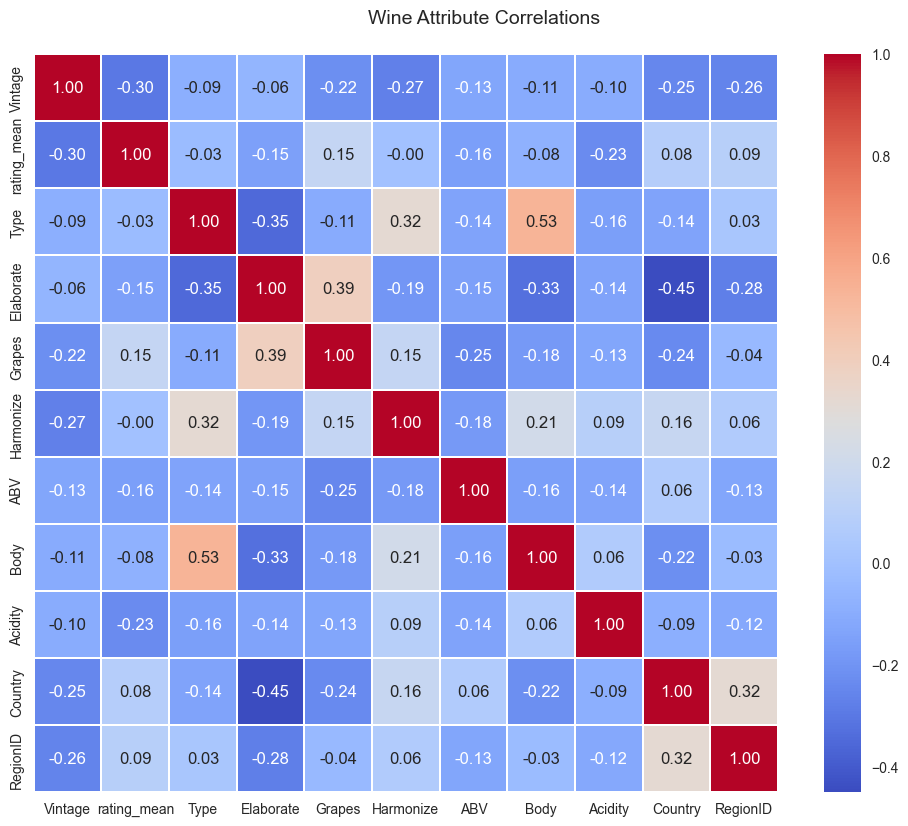

In [38]:
corrmat = df_test.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attribute Correlations', fontsize=14)

We don’t have any strong correlations here bot we have some moderate ones. We can see the highest correlation is between ‘Body’ and ‘Type’ at 0.53. There are also a lot of negative correlations here which could mean that some of the attributes indicate the absence of others. For instance, a wine with more ‘ABV’ may have lower ‘Acidity.’

Let’s take a quick look at how the attributes correlate with the rating mean.

In [39]:
wine_df.corr()['rating_mean'].abs().sort_values(ascending=False)

C:\Users\jwatki8\AppData\Local\Temp\ipykernel_5864\3467558946.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine_df.corr()['rating_mean'].abs().sort_values(ascending=False)


rating_mean                               1.000000
Rating                                    0.466384
ABV                                       0.279522
rater_mean                                0.274991
RatingID                                  0.208600
body_Very full-bodied                     0.182694
UserID                                    0.112783
acid_Medium                               0.097428
type_White                                0.082588
acid_High                                 0.072706
type_Dessert                              0.064734
body_Full-bodied                          0.062383
type_Rosé                                 0.062141
body_Medium-bodied                        0.060513
type_Red                                  0.060434
RegionID                                  0.056779
acid_Low                                  0.049002
rater_count                               0.048316
body_Light-bodied                         0.040764
body_Very light-bodied         

No strong correlations here either. Lastly I would like to examine some of the correlations between the new dummy variables we created.

In [40]:
wine_dfdum=wine_df.drop(columns=['RatingID','UserID', 'WineID', 'Rating', 'rating_mean', 'rater_count', 'rater_mean', 'RegionID','WineryID'])

C:\Users\jwatki8\AppData\Local\Temp\ipykernel_5864\1807380805.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = wine_dfdum.corr()


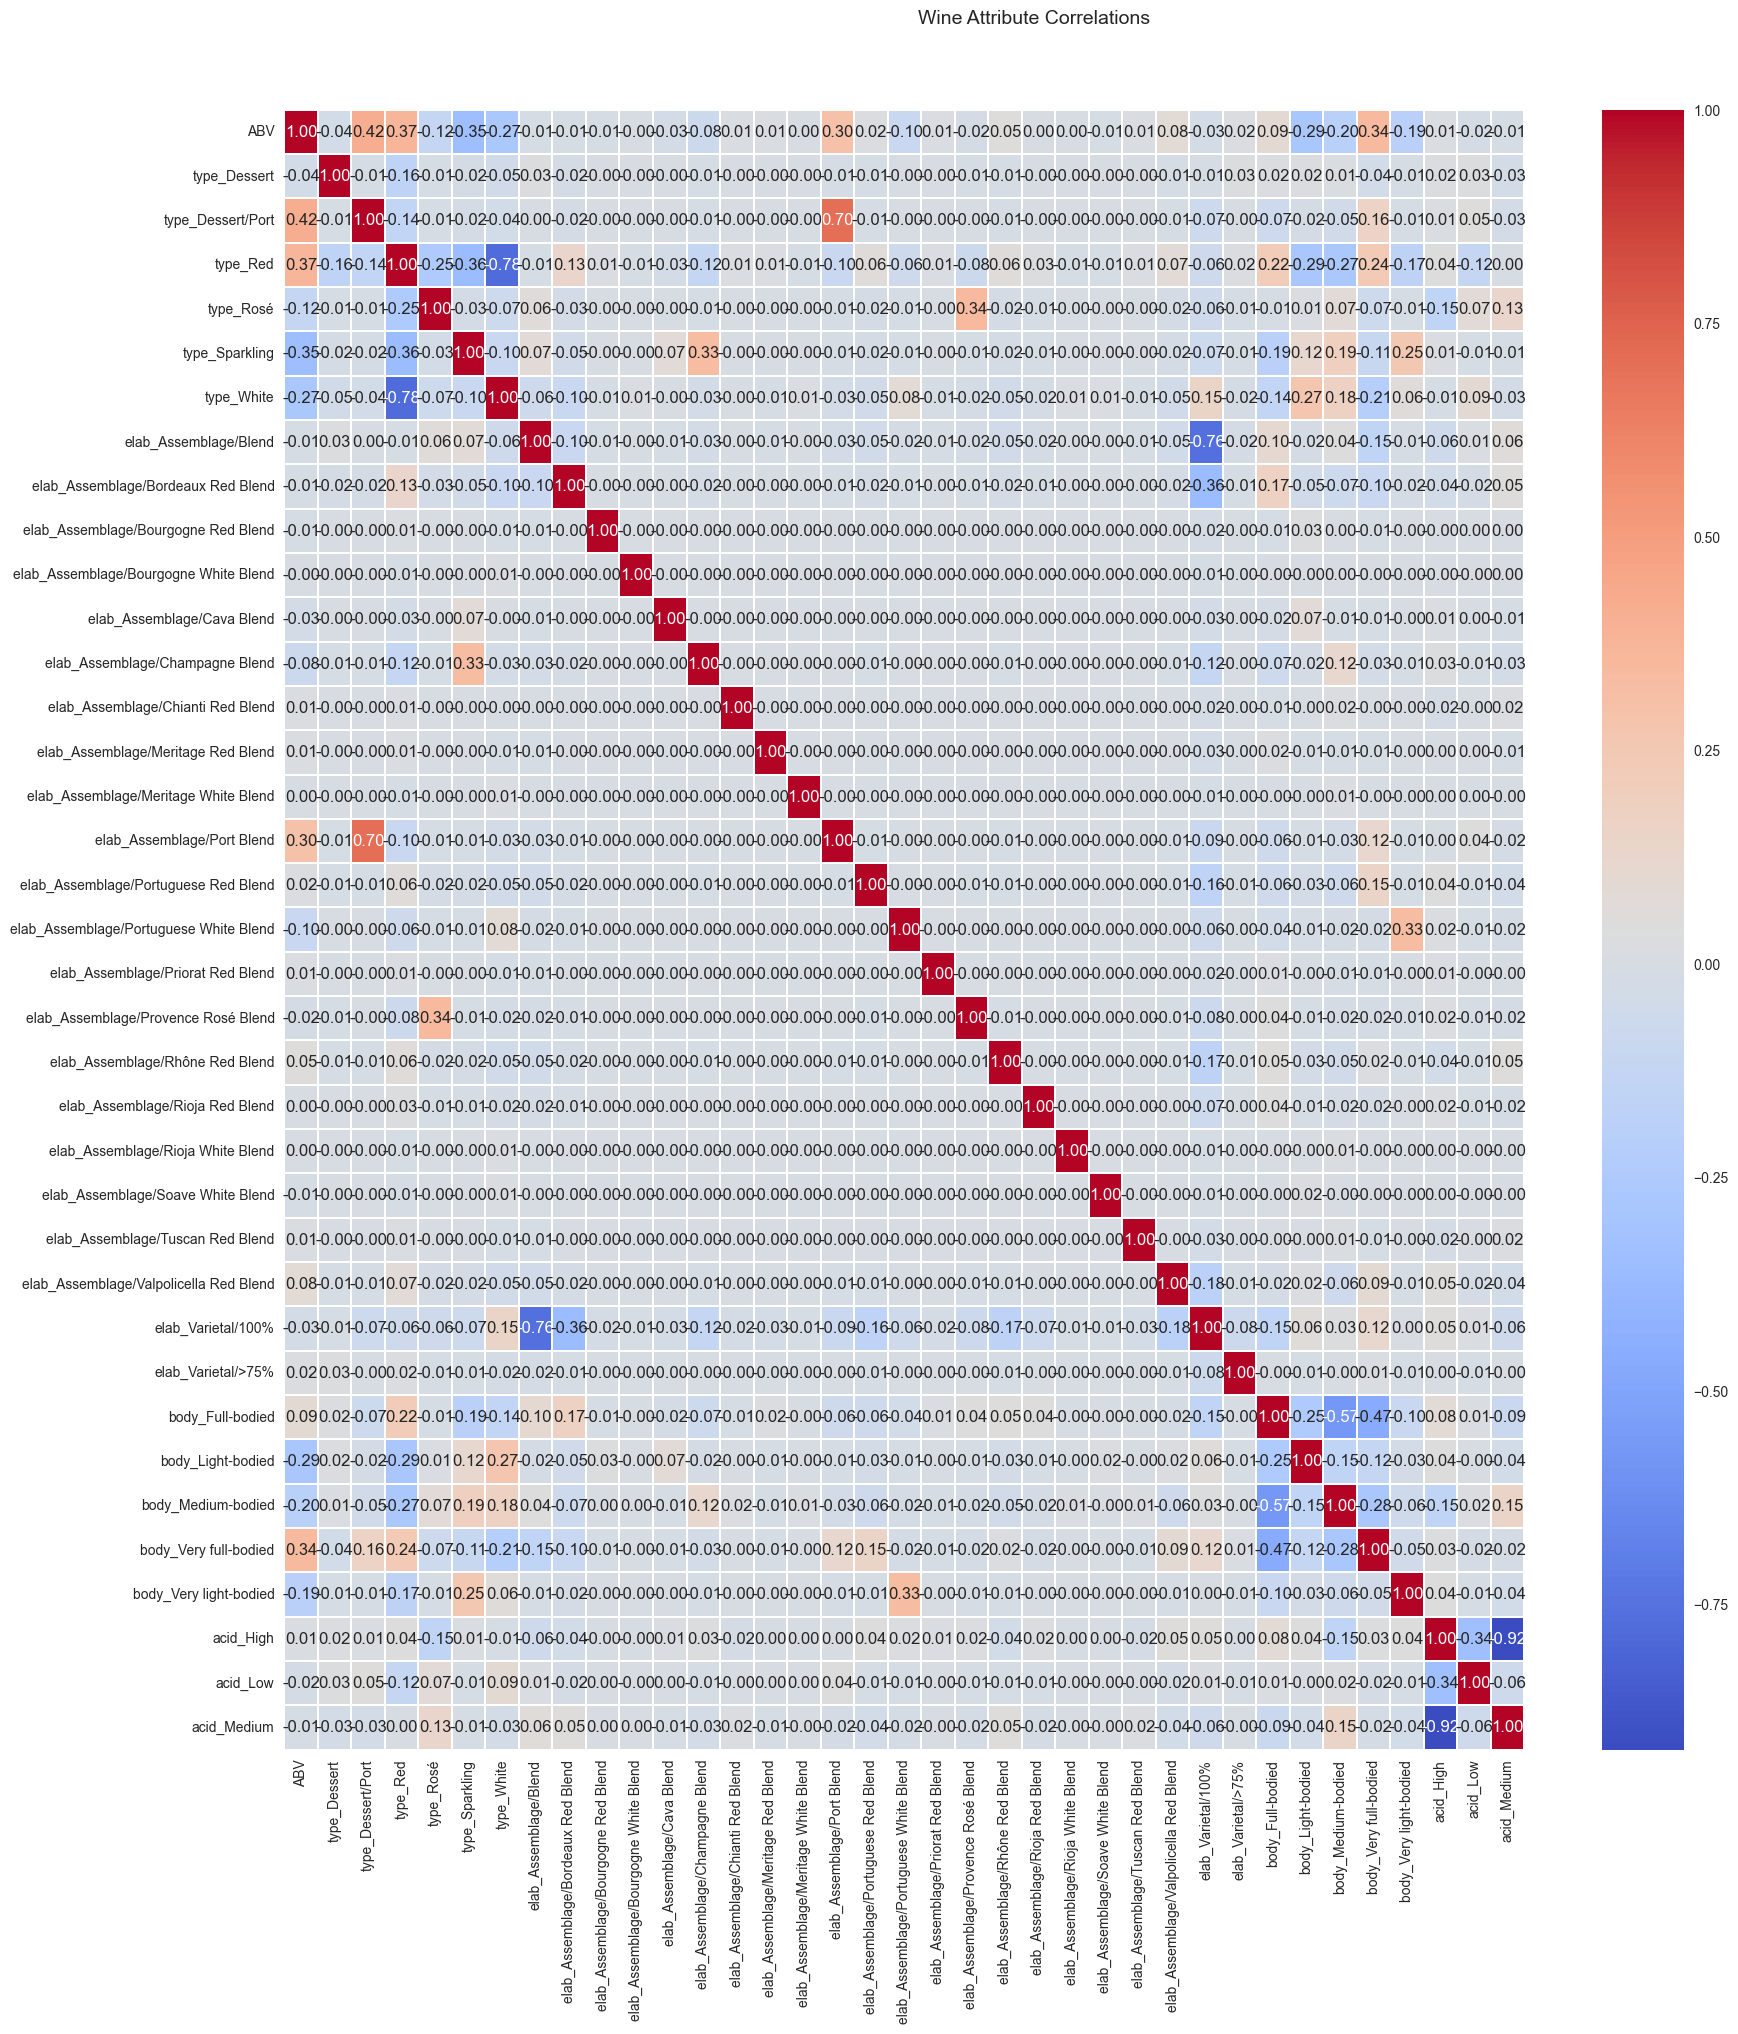

In [41]:
corrmat = wine_dfdum.corr()
f, ax = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attribute Correlations', fontsize=14)

As would be expected we have a few variables that have high negative correlations because they are in the same category. For example, low, medium and high acidity are all negatively correlated because they are all different levels of the same scale.

After exploring this data further here are my key takeaways:

1. There are a good amount of negative correlation in between the variables because the different variables are what make each wine distinct.

2. Most of our data is categorical in some way and need a dummy variable to be created for predictive purposes.

3. The rating of the wines don’t aren’t showing any clear signs of being correlated with any other features. This could be an early sign that this variable doesn’t need to be a deciding factor when recommending wines to a customer.

4. We have a mixture of wine data and user data that will serve as a good base for creating an accurate recommender system.
